# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/와빅_DA주니어_교육세션/FIFA_2019_data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# 데이터 기초통계량(결측치, 이상치 분석 포함)

In [6]:
df = df.iloc[:, 2:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Photo                     18207 non-null  object 
 3   Nationality               18207 non-null  object 
 4   Flag                      18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Club Logo                 18207 non-null  object 
 9   Value                     18207 non-null  object 
 10  Wage                      18207 non-null  object 
 11  Special                   18207 non-null  int64  
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [7]:
df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [40]:
df.describe().columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [9]:
df.isnull().sum()

Name                 0
Age                  0
Photo                0
Nationality          0
Flag                 0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 87, dtype: int64

<Axes: >

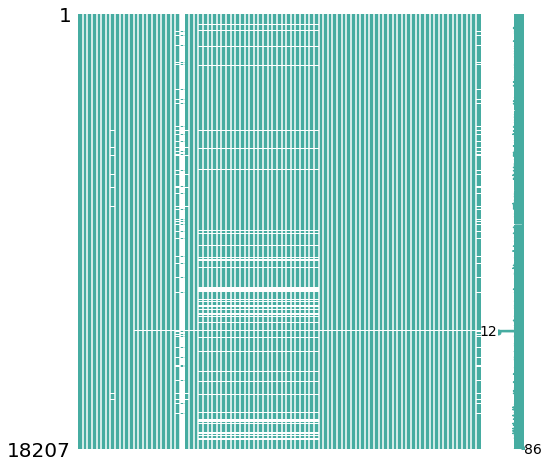

In [12]:
# msno를 사용해 결측치 위치 시각화
msno.matrix(df=df, figsize=(8, 8), color=(70/255, 172/255, 161/255))

In [13]:
# 결측지 값을 0으로 채움
df.fillna(value=0, inplace=True)
df.isnull().sum().sum()

0

In [14]:
# 선수가 최적의 포지션에 있을 경우의 능력치만 관심을 두고 분석하고자 한다(Ovallall, Potential 컬럼럼). 그렇기에 선수가 최적의 포지션이 아닌 다른 포지션에 위치할 경우의 능력치들은 분석에서 제외하였다.
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis = 1, inplace = True)

In [16]:
# 선수의 키와 몸무게 컬럼의 데이터를 수치형 및 cm, kg 단위로 변경
df[['Height', 'Weight']].head()

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [17]:
def height_convr(x):
    if type(x)== str:
        y= x.split("'")
        return (int(y[0]) * 12 + int(y[1])) * 2.54
    else:
        return int(x)

def weight_convr(x):
    if type(x) == str:
        return int(x.split('lbs')[0]) * 0.453592
    else:
        return int(x)

In [19]:
df['Height'] = df['Height'].apply(height_convr)
df['Weight'] = df['Weight'].apply(weight_convr)
df[['Height', 'Weight']].head()

,Height,Weight
0,170,72
1,187,83
2,175,68
3,193,76
4,180,69


In [22]:
df[['Wage', 'Value']].head()

,Wage,Value
0,€565K,€110.5M
1,€405K,€77M
2,€290K,€118.5M
3,€260K,€72M
4,€355K,€102M


In [35]:
wage = df['Wage'].apply(lambda x:str(x)[1:])
value = df['Value'].apply(lambda x:str(x)[1:])

In [36]:
# 선수 급여와 선수 시장가치 값을 수치형으로 변환
df['Wage'] = wage.replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

df['Value'] = value.replace({'K': '*1e3', 'M': '*1e6'}, 
                           regex=True).map(pd.eval).astype(int)

In [37]:
df[['Wage', 'Value']].head()

,Wage,Value
0,565000,110500000
1,405000,77000000
2,290000,118500000
3,260000,72000000
4,355000,102000000


In [41]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()[['Age', 'Overall', 'Potential', 'Height', 'Weight', 'Wage', 'Value']]

,Age,Overall,Potential,Height,Weight,Wage,Value
count,18207.00,18207.00,18207.00,18207.00,18207.00,18207.00,18207.00
mean,25.12,66.24,71.31,180.21,74.61,9731.31,2410695.88
std,4.67,6.91,6.14,11.42,8.05,21999.29,5594932.67
min,16.00,46.00,48.00,0.00,0.00,0.00,0.00
25%,21.00,62.00,67.00,175.00,69.00,1000.00,300000.00
50%,25.00,66.00,71.00,180.00,74.00,3000.00,675000.00
75%,28.00,71.00,75.00,185.00,79.00,9000.00,2000000.00
max,45.00,94.00,95.00,205.00,110.00,565000.00,118500000.00


# 컬럼 정보 및 관계

In [38]:
df.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [39]:
df.nunique()

Name              17194
Age                  29
Photo             18207
Nationality         164
Flag                164
                  ...  
GKHandling           71
GKKicking            80
GKPositioning        80
GKReflexes           77
Release Clause     1245
Length: 61, dtype: int64

<Axes: xlabel='Age', ylabel='Potential'>

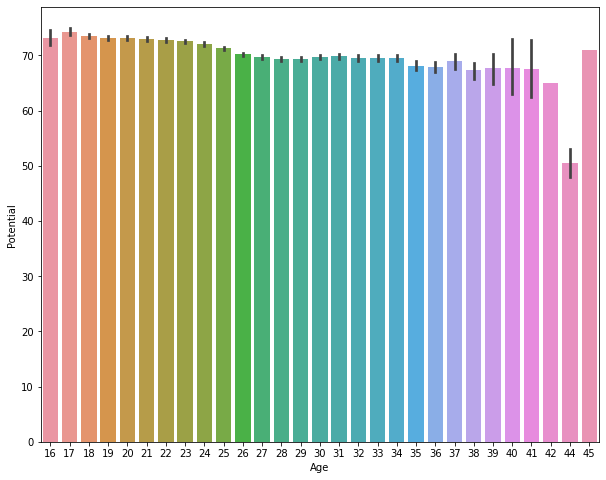

In [44]:
# Age와 Potential의 관계
plt.figure(figsize=(10,8))
sns.barplot(x = 'Age', y = 'Potential', data = df)

<Axes: xlabel='Overall', ylabel='Value'>

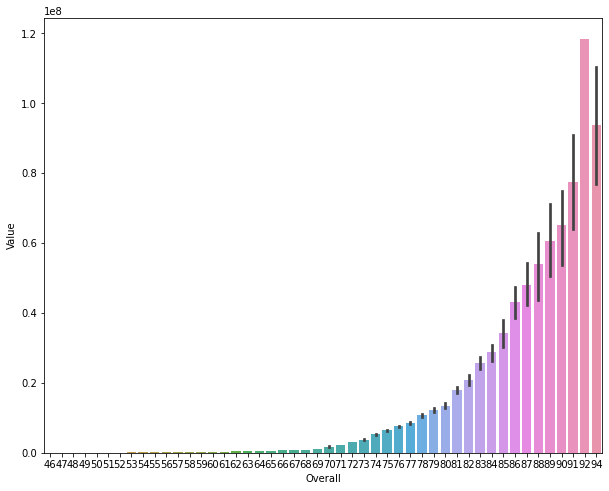

In [46]:
# Overall과 Value의 관계
plt.figure(figsize=(10,8))
sns.barplot(x = 'Overall', y = 'Value', data = df)

In [47]:
# 선수의 Potential과 세부 축구 능력치 컬럼들간의 상관관계 분석을 통해 어떤 능력들이 선수의 잠재력에 영향을 주는지 확인
skill_df = df[["Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","FKAccuracy",
                         "LongPassing","BallControl","Acceleration","SprintSpeed","Agility","Reactions","Balance","ShotPower",
                         "Jumping","Stamina","Strength","LongShots","Aggression","Interceptions","Positioning","Vision",
                         "Penalties","Composure","Marking","StandingTackle","SlidingTackle","GKDiving","GKHandling","GKKicking",
                         "GKPositioning","GKReflexes", "Potential"]]
skill_df.drop_duplicates().head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Potential
0,84.00,95.00,70.00,90.00,86.00,97.00,93.00,94.00,87.00,96.00,...,96.00,33.00,28.00,26.00,6.00,11.00,15.00,14.00,8.00,94
1,84.00,94.00,89.00,81.00,87.00,88.00,81.00,76.00,77.00,94.00,...,95.00,28.00,31.00,23.00,7.00,11.00,15.00,14.00,11.00,94
2,79.00,87.00,62.00,84.00,84.00,96.00,88.00,87.00,78.00,95.00,...,94.00,27.00,24.00,33.00,9.00,9.00,15.00,15.00,11.00,93
3,17.00,13.00,21.00,50.00,13.00,18.00,21.00,19.00,51.00,42.00,...,68.00,15.00,21.00,13.00,90.00,85.00,87.00,88.00,94.00,93
4,93.00,82.00,55.00,92.00,82.00,86.00,85.00,83.00,91.00,91.00,...,88.00,68.00,58.00,51.00,15.00,13.00,5.00,10.00,13.00,92


<Axes: >

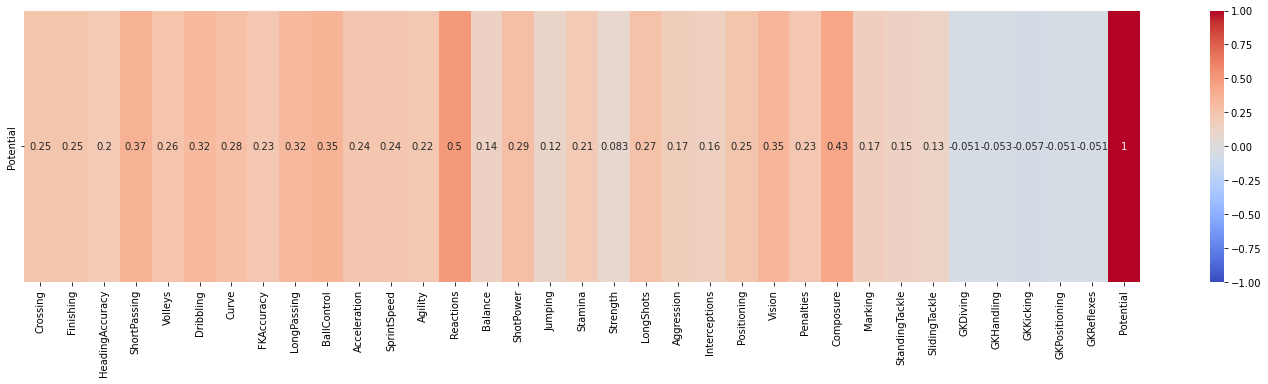

In [48]:
# 히트맵 결과를 통해 Reactions, Composure, Vision, ShortPassing 등이 선수의 잠재력에 큰 영향을 주는 것을 확인
plt.figure(figsize=(25,5))
a = skill_df.corr().loc['Potential':]
sns.heatmap(a, vmin=-1, cmap='coolwarm', annot = True)

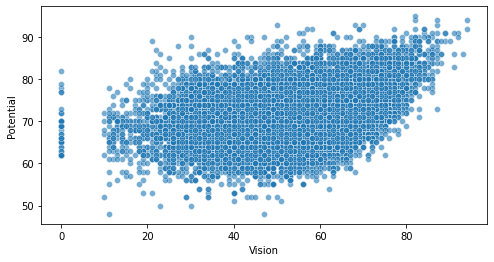

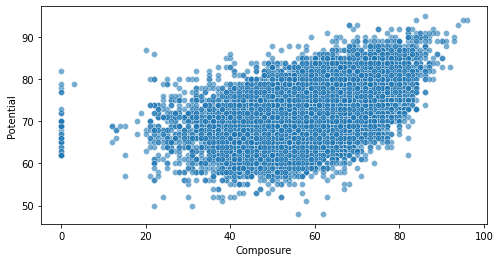

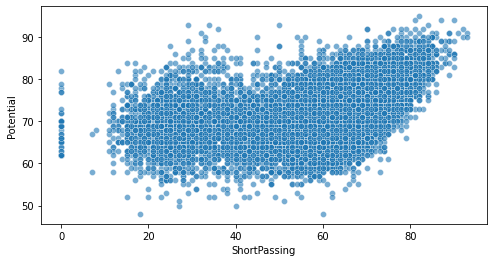

<ipython-input-49-ca60bdb3511c>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'Reactions', y = 'Potential', data = skill_df, palette='Bules_d', alpha=0.5)


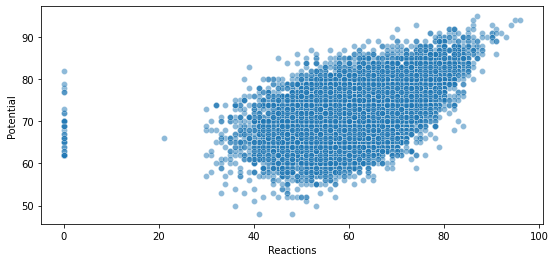

In [49]:
# 위의 4가지 요소들과 Potential값을 scatter plot을 통해 시각화
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Vision', y = 'Potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Composure', y = 'Potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'ShortPassing', y = 'Potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(9,4))
sns.scatterplot(x = 'Reactions', y = 'Potential', data = skill_df, palette='Bules_d', alpha=0.5)
plt.show()

In [50]:
# 선수의 Wage에 큰 영향을 주는 요소들을 상관관계 분석을 통해 파악
wage_df = df[['Potential', 'Overall', 'Value', 'Special', 'International Reputation', 'Wage']]
wage_df.head()

,Potential,Overall,Value,Special,International Reputation,Wage
0,94,94,110500000,2202,5.00,565000
1,94,94,77000000,2228,5.00,405000
2,93,92,118500000,2143,5.00,290000
3,93,91,72000000,1471,4.00,260000
4,92,91,102000000,2281,4.00,355000


<Axes: >

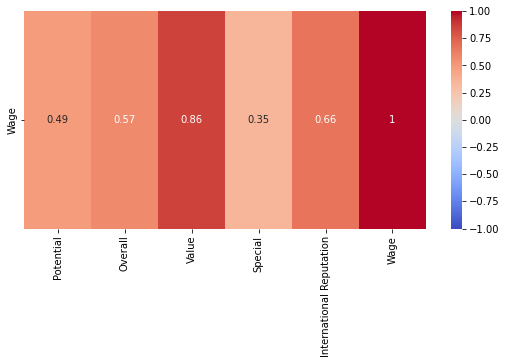

In [51]:
# 선수의 Value가 Wage에 가장 큰 영향을 미치는 것을 확인
wage_corr_matrix = wage_df.corr().loc['Wage':]
plt.figure(figsize=(9,4))
sns.heatmap(wage_corr_matrix, vmin=-1, cmap='coolwarm', annot = True)

<Axes: xlabel='Value', ylabel='Wage'>

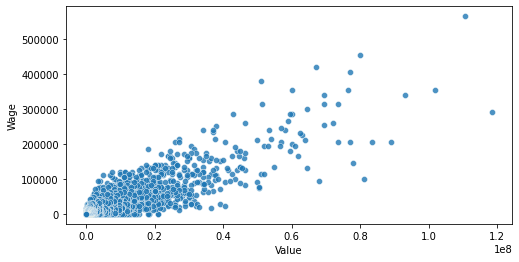

In [52]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Value', y ='Wage', data = wage_df, alpha=0.8)

In [55]:
# 각 축구클럽 별 선수들의 평균 Age, 평균 Potential을 파악하고 선수들의 Value 값의 합을 통해 클럽가치를 파악
club_age_mean = df.groupby('Club', as_index=False)['Age'].mean().sort_values(by = 'Age', ascending=True)
club_potential_mean = df.groupby('Club', as_index=False)['Potential'].mean().sort_values(by = 'Potential', ascending=False)
club_value_sum = df.groupby('Club', as_index=False)['Value'].sum().sort_values(by = 'Value', ascending=False)

In [60]:
# 젋은 선수들로 구성된 축구 클럽 Top 5
club_age_mean.head()

,Club,Age
232,FC Nordsjælland,20.26
222,FC Groningen,21.42
84,Bohemian FC,21.48
238,FC Sochaux-Montbéliard,21.68
211,FC Admira Wacker Mödling,21.93


In [61]:
# 나이 많은 선수들로 구성된 축구 클럽 Top 5
club_age_mean.tail()

,Club,Age
133,Chapecoense,30.40
65,Atlético Paranaense,30.40
89,Botafogo,30.40
169,Cruzeiro,30.60
434,Paraná,31.60


In [62]:
# 클럽에 소속된 선수들의 평균 잠재력이 높은 축구 클럽 Top 5
club_potential_mean.head()

,Club,Potential
327,Juventus,85.52
213,FC Barcelona,85.30
471,Real Madrid,84.64
375,Manchester City,83.91
215,FC Bayern München,83.66


In [63]:
# 선수가치에 기반한 축구 클럽 가치 Top 5
club_value_sum.head()

,Club,Value
471,Real Madrid,874425000
213,FC Barcelona,852600000
375,Manchester City,786555000
327,Juventus,704475000
215,FC Bayern München,679025000


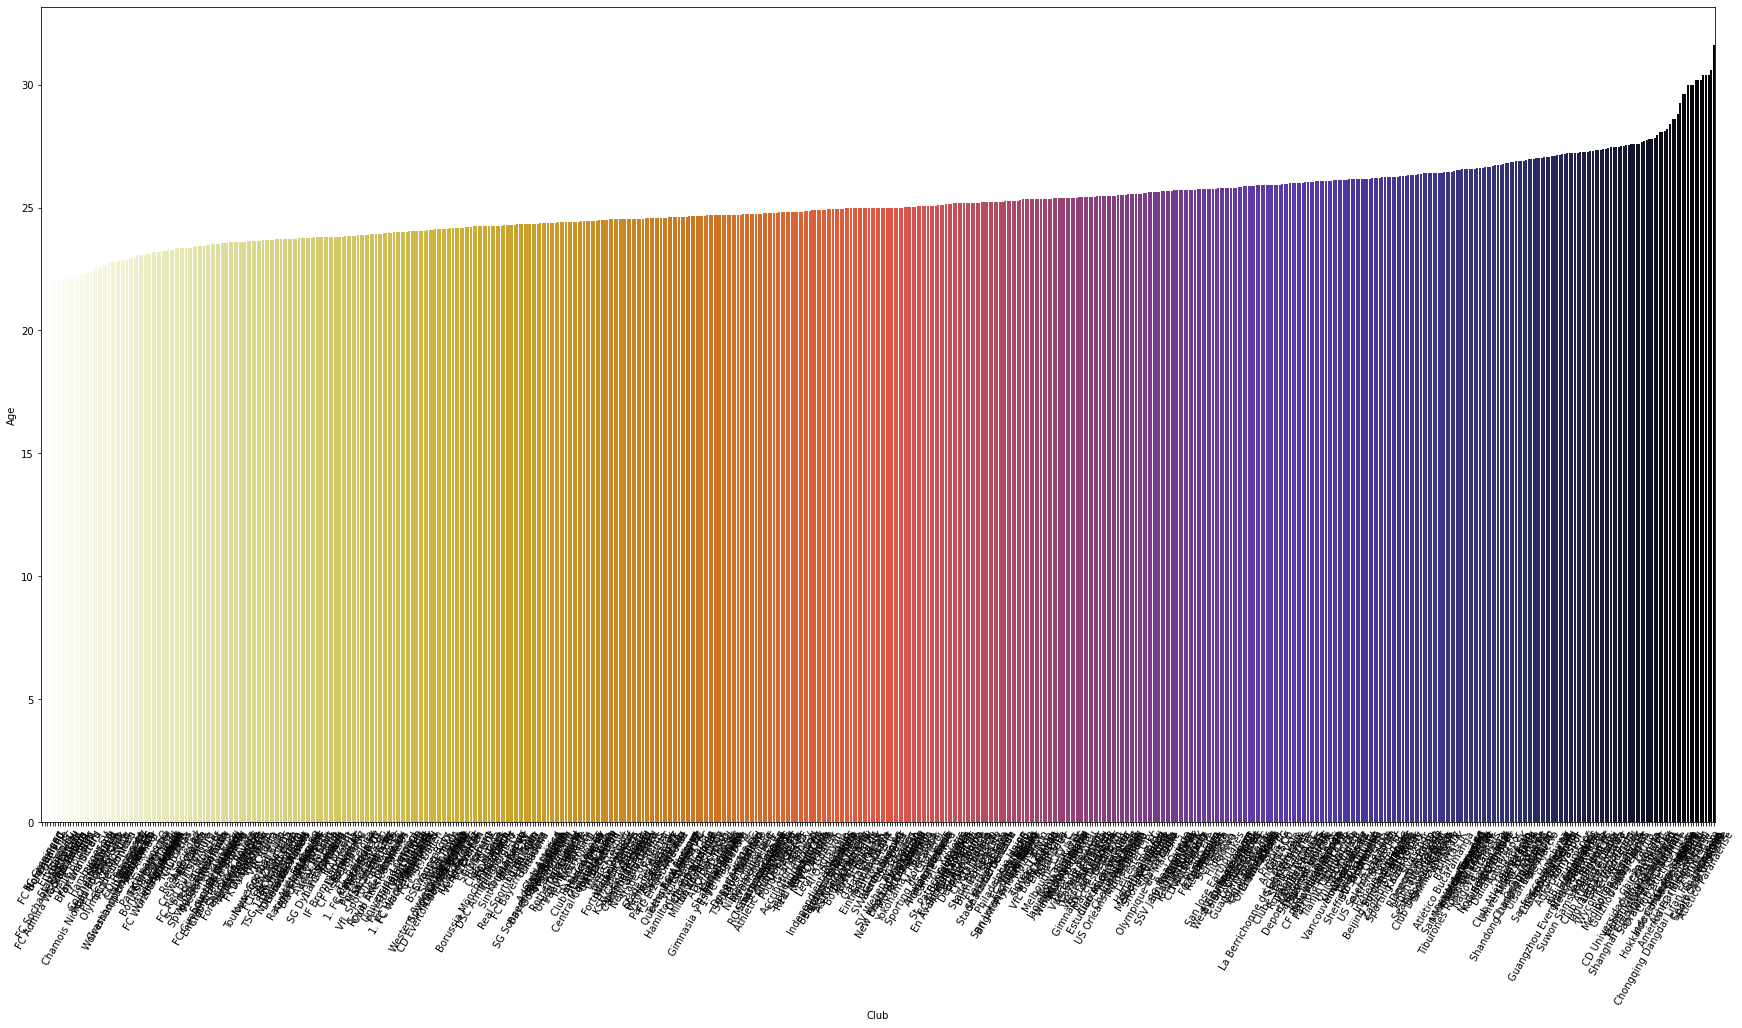

In [66]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'Club', y ='Age', 
            palette='CMRmap_r' ,data = club_age_mean)
plt.xticks(rotation=60)
plt.show()

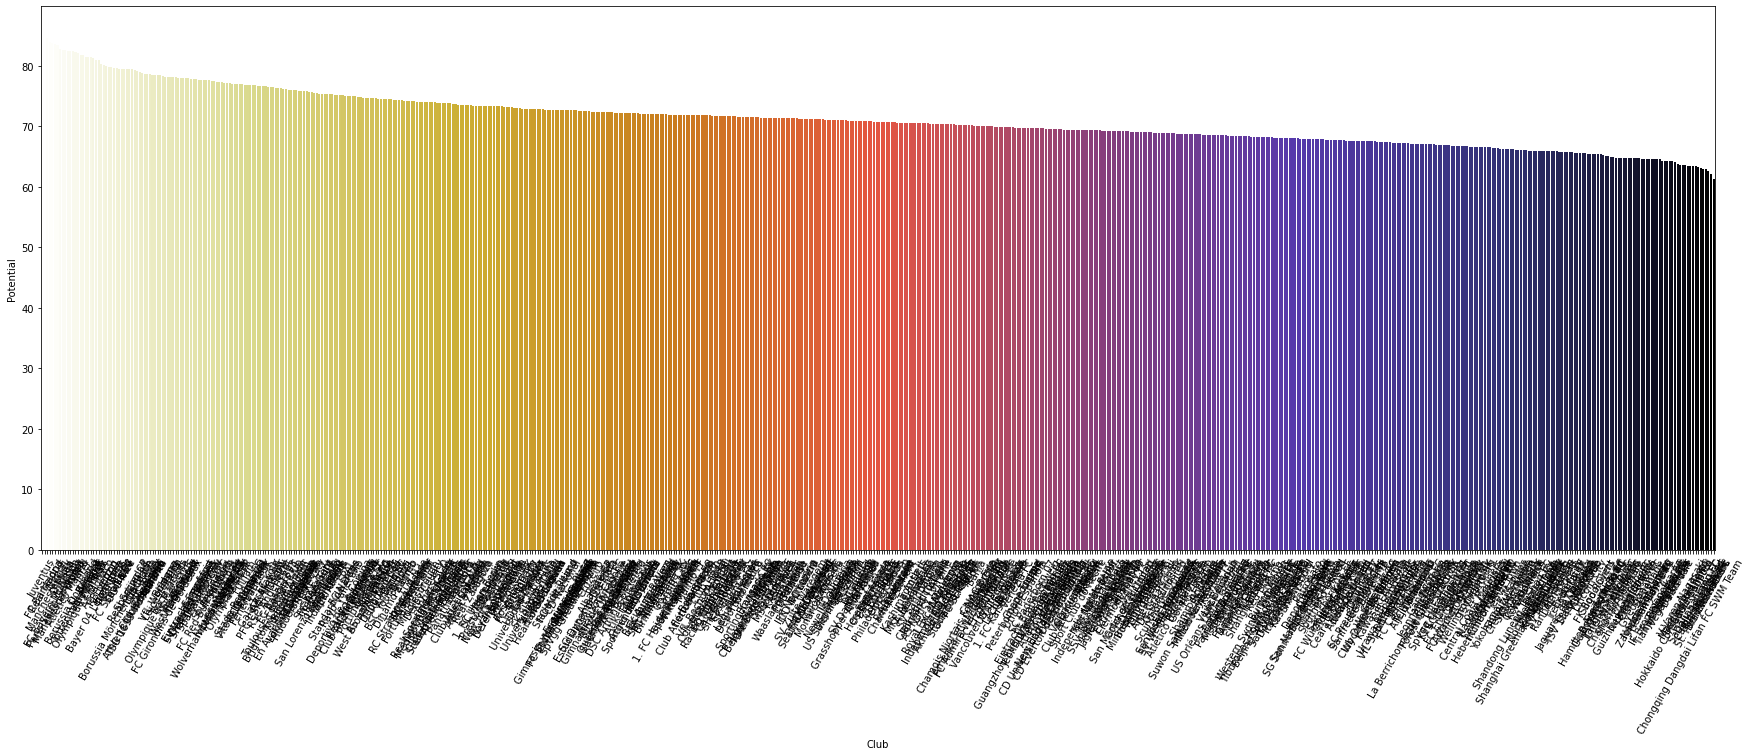

In [67]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'Club', y ='Potential', 
            palette='CMRmap_r' ,data = club_potential_mean)
plt.xticks(rotation=60)
plt.show()

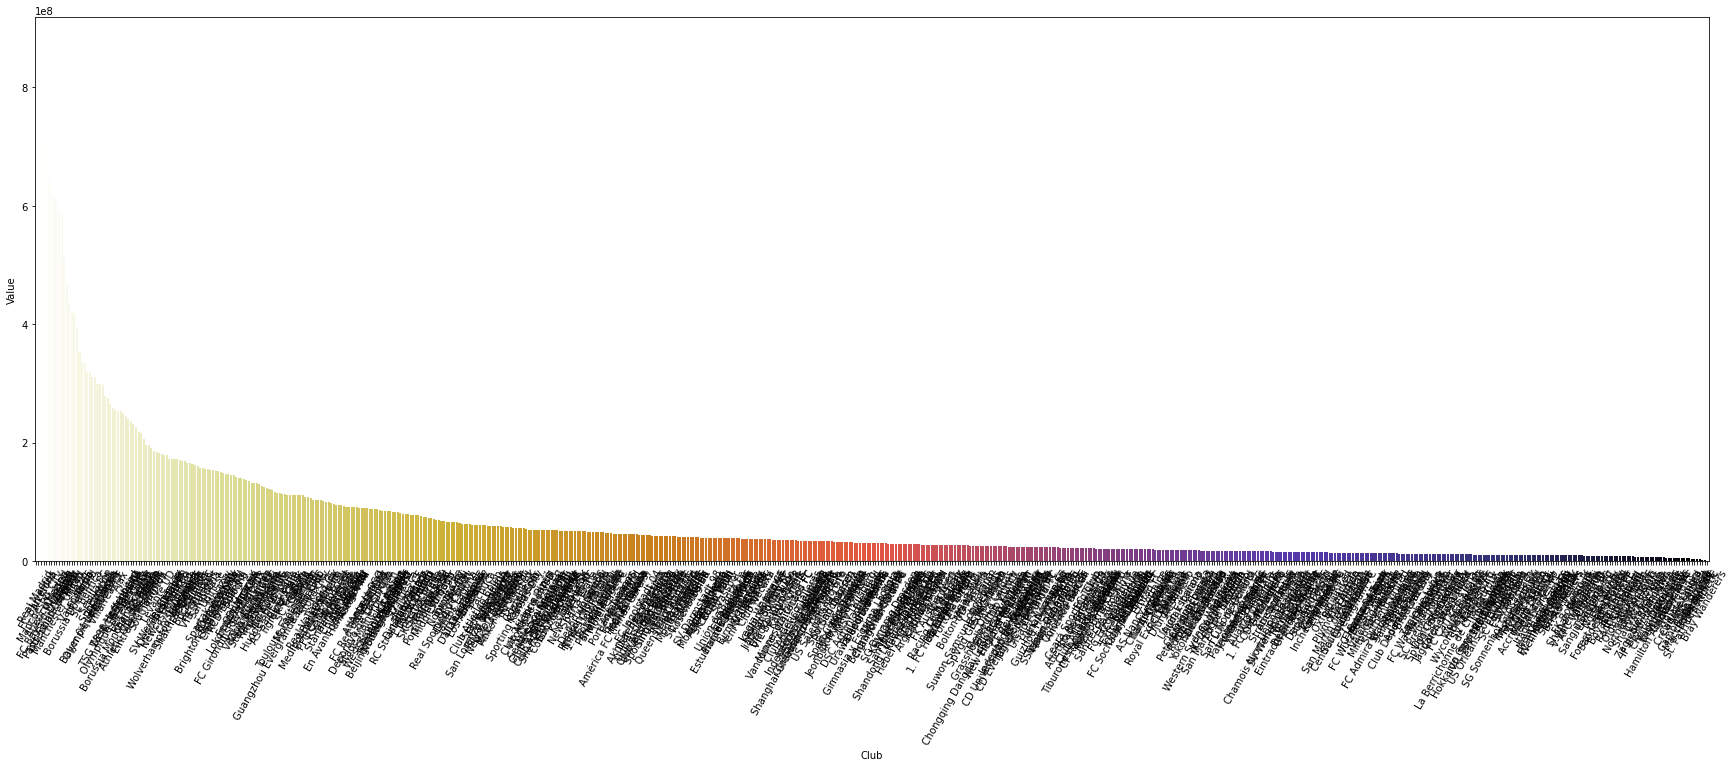

In [68]:
# 클럽의 평균 선수 연령의 차이, 평균 선수 잠재력의 폭에 비해 평균 가치는 큰 격차를 보이는 것으로 보아, scaling을 진행한 후 다시 시각화를 진행해 보거나 이러한 결과가 나온 원인을 클럽 가치를 결정짓는 다른 요소들을 추가로 분석해보는 방식을 추후에 진행해볼 수 있다.
plt.figure(figsize=(30,10))
sns.barplot(x = 'Club', y ='Value', 
            palette='CMRmap_r' ,data = club_value_sum)
plt.xticks(rotation=60)
plt.show()